## 🚀 Objective of the Code / Objetivo del Código 🎯

Hey there! 👋 So, this code is all about **exploring board games data** 📊🎲 and finding **cool patterns** 🔍. Here’s what it does:

1. **Loads a dataset** of board games 📚.
2. **Filters and cleans up** the data to focus on the most important info like playtime ⏱, ratings 🌟, and game difficulty ⚡.
3. **Calculates correlations** 📈 (like, how much does game rating affect how many people own it? 🤔).
4. **Plots some sweet graphs** with color and text to make the data easy to understand 🎨📊.
5. **Shows a heatmap** of correlations 🟩 and scatter plots to visualize relationships between different game features 🎮.

It’s like digging into a treasure chest of board game info and making sense of it with awesome visuals! 🏆✨

---

¡Hola! 👋 Este código trata sobre **explorar datos de juegos de mesa** 📊🎲 y encontrar **patrones chidos** 🔍. Así es como funciona:

1. **Carga un dataset** de juegos de mesa 📚.
2. **Filtra y limpia** los datos para enfocarse en lo más importante, como el tiempo de juego ⏱, las calificaciones 🌟 y la dificultad ⚡.
3. **Calcula correlaciones** 📈 (como, ¿qué tanto la calificación de un juego afecta cuántas personas lo poseen? 🤔).
4. **Genera gráficos increíbles** con color y texto para que los datos sean más fáciles de entender 🎨📊.
5. **Muestra un mapa de calor** de correlaciones 🟩 y gráficos de dispersión para visualizar las relaciones entre diferentes características de los juegos 🎮.

¡Es como explorar un cofre del tesoro de información sobre juegos de mesa y darle sentido con visuales geniales! 🏆✨


                                                bgg_url  game_id       names  \
rank                                                                           
1     https://boardgamegeek.com/boardgame/174430/glo...   174430  Gloomhaven   

      min_players  max_players  avg_time  min_time  max_time  year  \
rank                                                                 
1               1            4       120        60       120  2017   

      avg_rating  geek_rating  num_votes  \
rank                                       
1        8.98893      8.61858      15376   

                                              image_url  age  \
rank                                                           
1     https://cf.geekdo-images.com/original/img/lDN3...   12   

                                               mechanic  owned  \
rank                                                             
1     Action / Movement Programming, Co-operative Pl...  25928   

                       

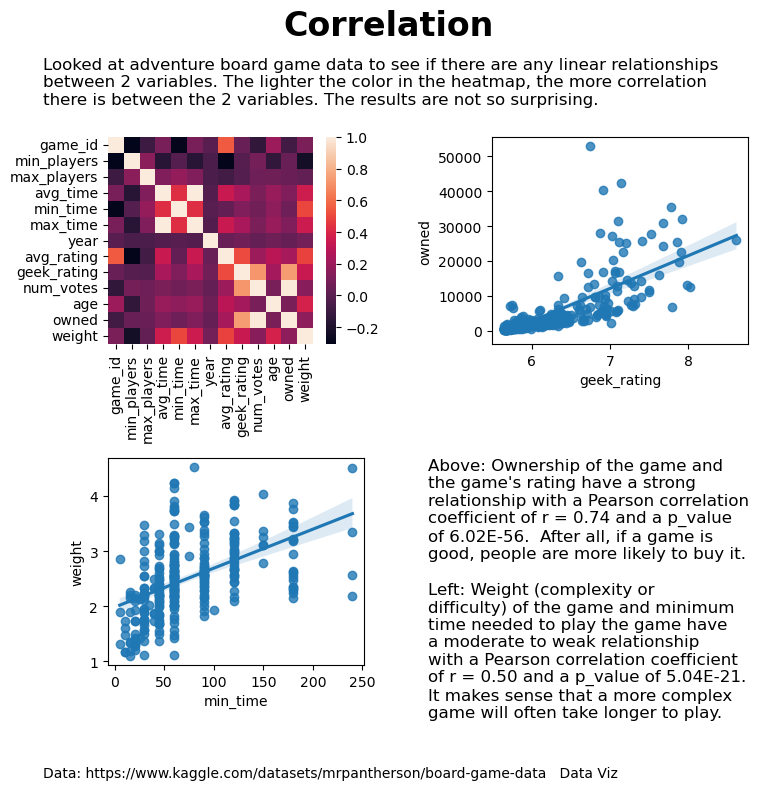

In [1]:
# Importing necessary libraries
import numpy as np  # linear algebra / álgebra lineal
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv) / procesamiento de datos, entrada/salida de archivos CSV (por ejemplo, pd.read_csv)
import matplotlib.pyplot as plt  # for plotting graphs / para graficar
import seaborn as sns  # statistical data visualization / visualización de datos estadísticos
from scipy import stats  # for statistical functions like correlation / para funciones estadísticas como la correlación

# Read the dataset from a CSV file into a pandas dataframe
df = pd.read_csv('bgg_db_1806.csv', header=0, index_col=0)  # cargar el archivo CSV en un dataframe
print(df.head(1))  # print the first row of the dataframe / imprimir la primera fila del dataframe
print(df.columns)  # print the column names of the dataframe / imprimir los nombres de las columnas del dataframe

# Selecting only numerical columns
df2 = df[['game_id', 'min_players', 'max_players', 'avg_time',  # columnas numéricas seleccionadas
          'min_time', 'max_time', 'year', 'avg_rating', 'geek_rating', 
          'num_votes', 'age', 'owned', 'weight']]  # selección de las columnas numéricas para el análisis
print(df2)  # print the selected data / imprimir los datos seleccionados

# Generate a correlation matrix for the numerical columns
corr_matrix = df2.corr()  # matriz de correlación entre las columnas numéricas
round(corr_matrix, 2)  # round the correlation matrix to two decimal places / redondear la matriz de correlación a dos decimales

# Plotting multiple subplots in a single figure
fig, ax = plt.subplots(2, 2,  # 2 rows, 2 columns of subplots / 2 filas, 2 columnas de subgráficos
    figsize=(8,8))  # dimensions of the figure in inches / dimensiones de la figura en pulgadas

# Adjusting the spacing between the subplots
fig.subplots_adjust(
    left=0.15, right=0.95, bottom=0.16, top=0.82,  # margins of the figure / márgenes de la figura
    wspace=0.5, hspace=0.55)  # space between subplots / espacio entre subgráficos

#########################################################################
#  Title Area
#########################################################################

# Add main title to the figure
plt.suptitle("Correlation", fontsize=24, fontweight='bold')  # título principal
# Add explanatory text under the title
plt.figtext(0.069, 0.92, "Looked at adventure board game data to see if there are any linear relationships\nbetween 2 variables. The lighter the color in the heatmap, the more correlation\nthere is between the 2 variables. The results are not so surprising.",
            ha="left", va="top", fontsize=12)  # texto explicativo debajo del título

#########################################################################
# Footer Section
#########################################################################

# Add footer with data source
plt.figtext(0.069, 0.02, "Data: https://www.kaggle.com/datasets/mrpantherson/board-game-data   Data Viz", ha="left", fontsize=10)  # pie de página con la fuente de los datos

# Function to remove spines and ticks from a subplot for cleaner visualization
def make_text_section(_ax):  # función para eliminar los bordes y marcas del subgráfico para una visualización más limpia
    for loc in ['top', 'right', 'bottom', 'left']:  # remove all edges / eliminar todos los bordes
        _ax.spines[loc].set_visible(False)  # set visibility of spines to False / ocultar los bordes
    _ax.set_xticks([])  # remove x-axis ticks / eliminar las marcas del eje x
    _ax.set_yticks([])  # remove y-axis ticks / eliminar las marcas del eje y
    _ax.set_xlim(0, 1)  # set x-axis range from 0 to 1 / establecer el rango del eje x de 0 a 1
    _ax.set_ylim(0, 1)  # set y-axis range from 0 to 1 / establecer el rango del eje y de 0 a 1

# Function to add text labels in specific positions on subplots
def write_text(_ax, y, txt, _fontsize=12):  # función para agregar texto en posiciones específicas de los subgráficos
    _ax.text(-0.25, y, txt, ha="left", va="top", fontsize=_fontsize)  # insertar el texto en la posición dada

# Explore the categories present in the dataset (printed as string abbreviations)
def explore_categories():  # explorar las categorías presentes en el dataset
    for i in range(1, 21):  # display the first 20 categories / mostrar las primeras 20 categorías
        print(df.loc[i, 'category'])  # print the category name / imprimir el nombre de la categoría

# Function to get all unique categories from the dataset
def get_categories():  # función para obtener todas las categorías únicas del dataset
    category_set = set()  # create an empty set for unique categories / crear un conjunto vacío para las categorías únicas
    num_entries = len(df['category'])  # obtener el número de entradas en la columna 'category'
    for i in range(1, num_entries):  # iterate through each game / iterar sobre cada juego
        s = df.loc[i, 'category'].split(",")  # split categories by comma / dividir las categorías por comas
        for c in s:  # for each category in the split string / para cada categoría en la cadena dividida
            category_set.add(c.strip())  # add cleaned category to the set / agregar la categoría limpia al conjunto
    categories = sorted(list(category_set))  # sort categories / ordenar las categorías
    print(categories)  # print the categories / imprimir las categorías
    return categories  # return the sorted categories / devolver las categorías ordenadas

categories = get_categories()  # get all unique categories / obtener todas las categorías únicas

# Count how many games are in each category
cat_len = []  # list to store the number of games in each category / lista para almacenar el número de juegos por categoría
for cat in categories:  # for each category / para cada categoría
    cat_len.append(len(df[df['category'].str.contains(cat)]))  # count the games in each category / contar los juegos en cada categoría
print(cat_len)  # print the number of games in each category / imprimir el número de juegos por categoría

# Filter the dataframe for a specific game (Gloomhaven)
df_Gloomhaven = df[df['names'] == 'Gloomhaven']  # filter the dataframe for the game 'Gloomhaven' / filtrar el dataframe para el juego 'Gloomhaven'
df_Gloomhaven.loc[1, 'max_time']  # print the max time of the game / imprimir el tiempo máximo del juego

# Identify the outliers for average time (> 10000)
outliers = df[df['avg_time'] > 10000]  # filter the dataframe for games with avg_time > 10000 / filtrar el dataframe para juegos con avg_time > 10000
outliers.category  # print the categories of the outliers / imprimir las categorías de los outliers
"Wargame" in outliers.loc[966, "category"]  # check if 'Wargame' is in the outliers / verificar si 'Wargame' está en los outliers

# Filter for wargames specifically
wargame_df = df[df['category'].str.contains("Wargame")]  # filter the dataframe for wargames / filtrar el dataframe para juegos de guerra

# Filter for adventure games
adventure_df = df[df['category'].str.contains("Adventure")]  # filter the dataframe for adventure games / filtrar el dataframe para juegos de aventura

# Selecting only numerical columns for the adventure games
adventure_df_numeric = adventure_df.select_dtypes(include=[np.number])  # seleccionar solo columnas numéricas para los juegos de aventura

# Compute the correlation matrix for adventure games
corr_matrix = adventure_df_numeric.corr()  # calcular la matriz de correlación para los juegos de aventura
round(corr_matrix, 2)  # round the correlation matrix to two decimal places / redondear la matriz de correlación a dos decimales
sns.heatmap(corr_matrix, ax=ax[0,0])  # plot heatmap of correlations / graficar el mapa de calor de las correlaciones

# Scatter plot of "geek_rating" vs "owned" for adventure games
sns.regplot(x="geek_rating", y="owned", data=adventure_df, ax=ax[0,1])  # gráfico de dispersión de "geek_rating" vs "owned" para juegos de aventura

# Scatter plot of "min_time" vs "weight" for adventure games
sns.regplot(x="min_time", y="weight", data=adventure_df, ax=ax[1,0])  # gráfico de dispersión de "min_time" vs "weight" para juegos de aventura

# Clean up the last subplot area
make_text_section(ax[1,1])  # limpiar el área del último subgráfico

# Calculate Pearson correlation between "geek_rating" and "owned"
r, p_value = stats.pearsonr(adventure_df['geek_rating'], adventure_df['owned'])  # calcular la correlación de Pearson entre "geek_rating" y "owned"
write_text(ax[1,1], 1, "Above: Ownership of the game and\nthe game's rating have a strong\nrelationship with a Pearson correlation\ncoefficient of r = " + f"{r:.2f} and a p_value\nof {p_value:.2E}.  After all, if a game is\ngood, people are more likely to buy it.")  # escribir el texto explicativo sobre la correlación

# Calculate Pearson correlation between "min_time" and "weight"
r, p_value = stats.pearsonr(adventure_df['min_time'], adventure_df['weight'])  # calcular la correlación de Pearson entre "min_time" y "weight"
write_text(ax[1,1], 0.4, "Left: Weight (complexity or\ndifficulty) of the game and minimum\ntime needed to play the game have\na moderate to weak relationship\nwith a Pearson correlation coefficient\nof r = " + f"{r:.2f} and a p_value of {p_value:.2E}.\nIt makes sense that a more complex\ngame will often take longer to play.")  # escribir el texto explicativo sobre la correlación

# Save the figure as an image file
plt.savefig('day13.png')  # guardar la figura como una imagen

# Additional unused data exploration (left here for future use)
# Future TODO: organize graph building separately from data manipulation / Exploración de datos adicional no utilizada (dejada aquí para su uso futuro)
